In [1]:
from fastai.vision.all import *

In [60]:
bears = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [69]:
path = Path('images')
dls = bears.dataloaders(path, bs=4)

In [72]:
len(dls.train.items)

54

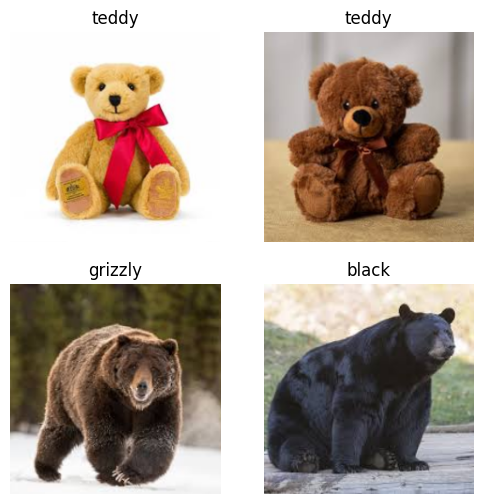

In [74]:
dls.valid.show_batch(max_n=10, nrows=2)

In [75]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

c:\Python\Python3.10.11\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwar

SuggestedLRs(valley=0.004365158267319202)

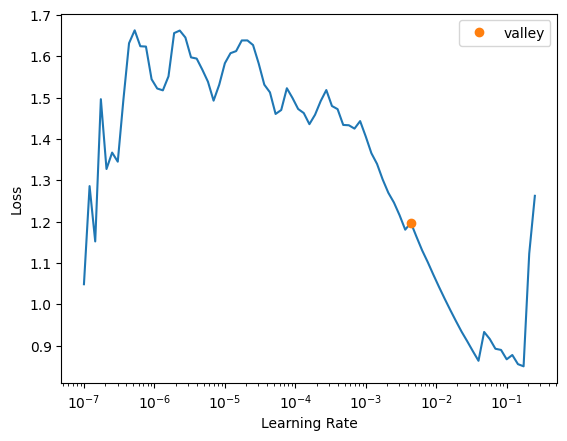

In [76]:
learn.lr_find()

In [77]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.192222,0.009612,0.000000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.324383,0.003384,0.000000,00:04
1,0.555092,0.000642,0.000000,00:05
2,0.516955,0.001129,0.000000,00:04
3,0.504153,0.000900,0.000000,00:05


In [79]:
learn.save('bear_clf')

Path('models/bear_clf.pth')

In [ ]:
learn.export('bear_clf.pkl')

In [82]:
learn.predict('images/teddy/teddy1.jpg')

('teddy', tensor(2), tensor([1.5581e-05, 1.7103e-04, 9.9981e-01]))

In [83]:
learn.predict('images/grizzly/grizzly1.jpg')

('grizzly', tensor(1), tensor([7.7930e-04, 9.9907e-01, 1.5279e-04]))

In [5]:
def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass



In [ ]:
ims = search_images_ddg('grizzly bear')